In [79]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

**<p style="color:red">EXERCISE 1</p>**

Create a pie chart for the same data as above with a figure size of (10,8). Make sure that:
* You specify the colors for each slice.
* Place the labels inside the slices and the percentages outside the pie.
* Explode two slices: Flying and Psychic.
* Add a shadow.
* Use the option `startangle` with a value of 90 and check the effect.

Hint. *Use the labeldistance and pctdistance parameters to position the labels and autopct text respectively.* (See Matplotlib Documentation)

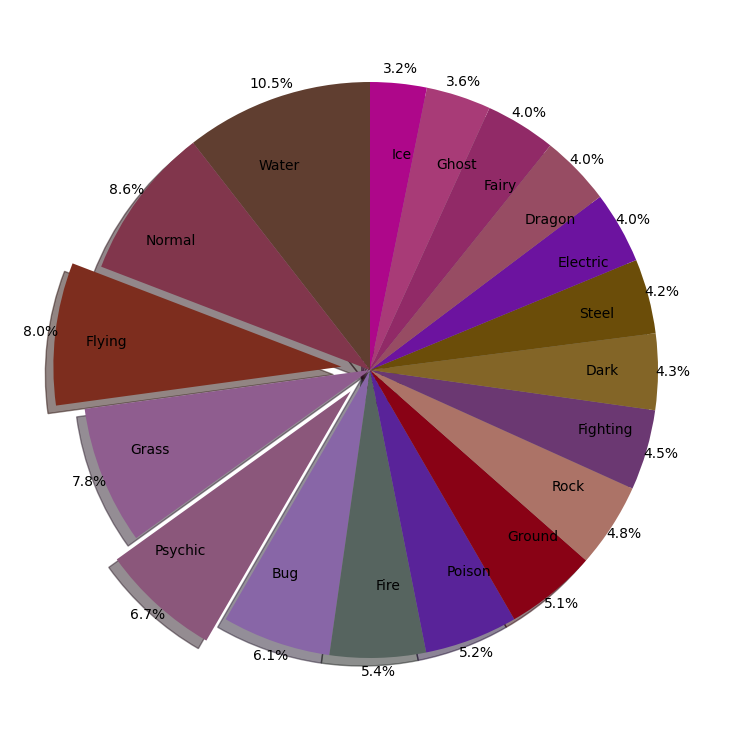

In [80]:
types = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Fire', 'Poison',
'Ground', 'Rock', 'Fighting', 'Dark', 'Steel', 'Electric', 'Dragon', 'Fairy',
'Ghost', 'Ice']
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]


fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

import random
colors = []
for i in range(len(types)):
 rgb = (random.uniform(0.3,.7), random.uniform(0,0.5),
random.uniform(0,0.7))
 colors.append(rgb)

explode = [0.1 if t in ['Flying', 'Psychic'] else 0 for t in types]

ax.pie(poke_num, labels=types, colors=colors, explode=explode,
shadow=True, startangle=90,
 labeldistance=0.75, autopct='%1.1f%%', pctdistance=1.05)
plt.show()

**<p style="color:red">EXERCISE 2</p>**

Create a pie chart to show the percentage of new immigrants grouped by continents in the year 2013.

* The plot should have a title.
* Use a custom color scheme for the slices.
* Show percentages on the slices with a custom color.
* Add a legend and do not show the labels.
* Use a shadow.
* Make any changes you think it make the plot better!

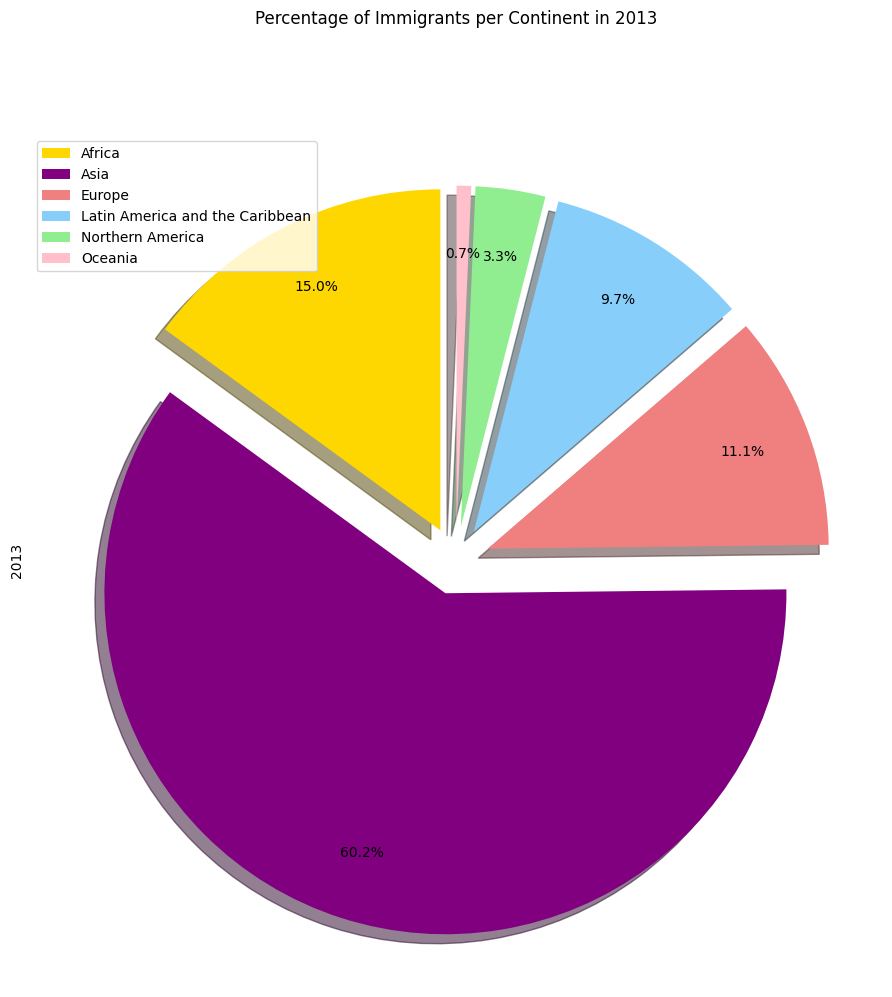

In [81]:
df = pd.read_excel('Canada.xlsx',sheet_name=1, skiprows=range(20))
years = list(range(1980, 2013))
df.drop(['OdName', 'Type', 'Coverage', 'AREA', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)
df.drop(years, axis=1, inplace=True)

grouped_df = df.groupby(['AreaName']).sum().reset_index()
grouped_df = grouped_df.drop(6)
grouped_df.set_index('AreaName', inplace=True)


colors = ['gold', 'purple', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

plt.title('Percentage of Immigrants per Continent in 2013', y=1.12)

grouped_df[2013].plot(kind='pie',
                        figsize=(11,15),
                        autopct='%1.1f%%',
                        startangle=90,
                        shadow=True,
                        labels=None,
                        pctdistance=0.8,
                        colors=colors,
                        explode=explode_list)
plt.legend(labels=grouped_df.index, loc='upper left')
plt.show()


**<p style="color:red">EXERCISE 3</p>**

Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013.

* The plot should have a title.
* The x and y axis should have a title.
* Make any changes you think it make the plot better!
* Plot a linear line of best fit for this data.

OdName  Denmark  Norway  Sweden  Total  Year
1980        272     116     281    669  1980
1981        293      77     308    678  1981
1982        299     106     222    627  1982
1983        106      51     176    333  1983
1984         93      31     128    252  1984


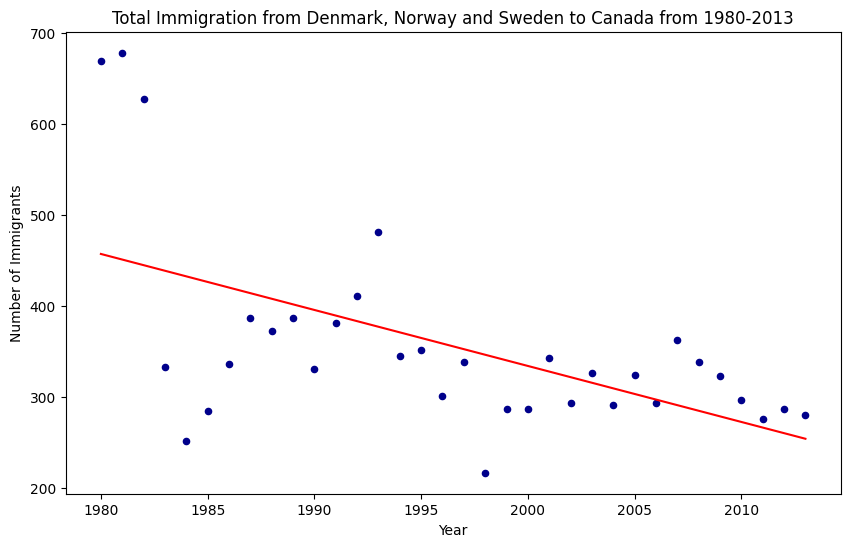

In [82]:
df = pd.read_excel('Canada.xlsx',sheet_name=1, skiprows=range(20))
years = list(range(1980, 2014))
df.drop(['Type', 'Coverage', 'AREA','AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)
df.set_index('OdName', inplace=True)


filtered_df = df.loc[['Denmark', 'Norway', 'Sweden']].transpose()

filtered_df['Total'] = filtered_df.sum(axis=1)
filtered_df['Year'] = years
print(filtered_df.head())

x = filtered_df['Year']
y = filtered_df['Total']
fit = np.polyfit(x, y, deg=1)


filtered_df.plot(kind='scatter', x='Year', y='Total', figsize=(10,6), color='darkblue')
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.title('Total Immigration from Denmark, Norway and Sweden to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()


**<p style="color:red">EXERCISE 4</p>**

Create a box plot to compare the distribution of the number of new immigrants from Romania and Poland for the period 1980 - 2013.

* The plot should have a title.
* The x axis should display labels for each box plot.
* The y axis should have a title.
* The median line of each box plot should be black and have line width 2.
* Make sure to customize the looks of: whiskers, colors of box plots and outliers.

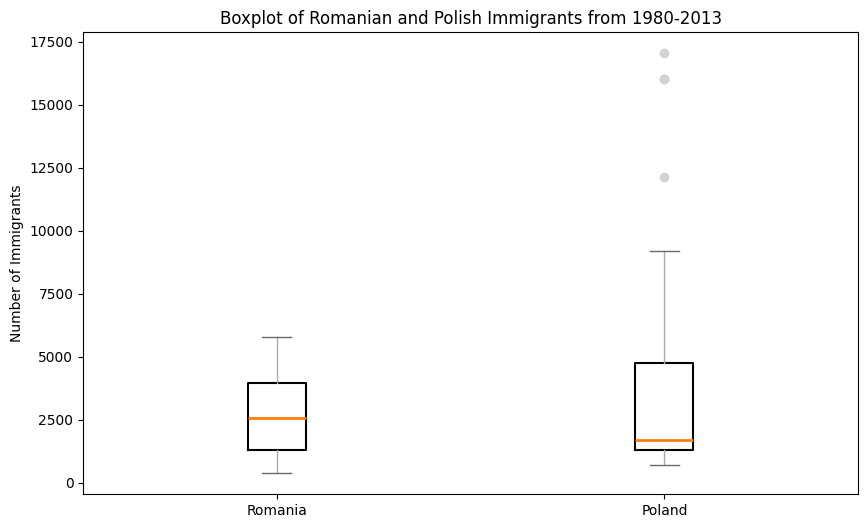

In [83]:
df = pd.read_excel('Canada.xlsx',sheet_name=1, skiprows=range(20))
years = list(range(1980, 2014))
df.drop(['Type', 'Coverage', 'AREA','AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)

df.set_index('OdName', inplace=True)
df_RP = df.loc[['Romania', 'Poland'], years].transpose()

boxproperties = dict(linestyle='-', linewidth=1.5)
medianproperties = dict(linestyle='-', linewidth=2)
flierproperties = dict(markerfacecolor = 'lightgrey', markeredgecolor = 'lightgrey')
colors = dict(boxes='dimgrey', whiskers='darkgray', medians='yellowgreen', caps='dimgrey')

df_RP.plot(kind='box',
           vert=True, 
           figsize=(10,6),
           color=colors,
           boxprops=boxproperties,
           medianprops=medianproperties,
           flierprops=flierproperties)
plt.title('Boxplot of Romanian and Polish Immigrants from 1980-2013')
plt.ylabel("Number of Immigrants")
plt.show()


**<p style="color:red">EXERCISE 5</p>**

Create a figure with 3 subplots as follows: 
1. A box plot to compare the distribution of the number of new immigrants from Romania, Hungary and Bulgaria for the period 1980 - 2013.
2. A line plot for the same data
3. A scatter plot for the same data

* The figure should have a title (not each subplot).
* The 3 sublpots should be placed on the same line.
* Customize each plot as you see best fit.

C:\Users\astal\AppData\Local\Temp\ipykernel_1236\518889666.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[0].boxplot(


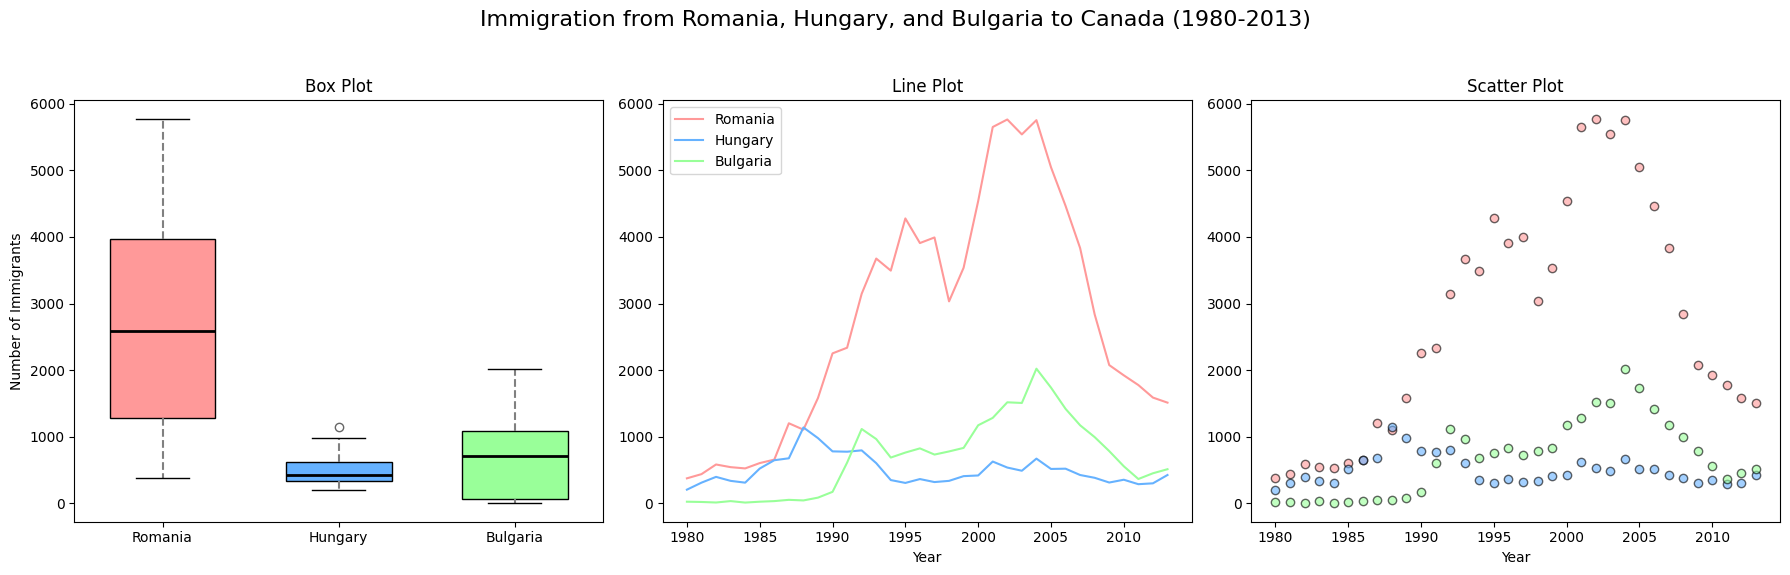

In [84]:
df_canada = pd.read_excel("Canada.xlsx", 
                    sheet_name=1,
                    skiprows=range(20),
                    skipfooter=2)
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_canada.columns = list(map(str, df_canada.columns))
df_canada.set_index('Country', inplace=True)
df_canada['Total'] = df_canada.sum(axis=1, numeric_only = True)
years = list(map(str, range(1980, 2014)))


data_romania = df_canada.loc['Romania', years]
data_hungary = df_canada.loc['Hungary', years]
data_bulgaria = df_canada.loc['Bulgaria', years]

data = [data_romania.values, data_hungary.values, data_bulgaria.values]
countries = ['Romania', 'Hungary', 'Bulgaria']
years_int = list(map(int, years))  

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

box = axes[0].boxplot(
    data,
    vert=True,
    patch_artist=True,
    labels=countries,
    widths=0.6
)
colors = ['#FF9999', '#66B2FF', '#99FF99']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color)
for median in box['medians']:
    median.set(color='black', linewidth=2)
for whisker in box['whiskers']:
    whisker.set(color='gray', linewidth=1.5, linestyle="--")
for flier in box['fliers']:
    flier.set(marker='o', color='red', alpha=0.6)
axes[0].set_title("Box Plot")
axes[0].set_ylabel("Number of Immigrants")

for data, color, country in zip([data_romania, data_hungary, data_bulgaria], colors, countries):
    axes[1].plot(years_int, data, label=country, color=color)
axes[1].set_title("Line Plot")
axes[1].set_xlabel("Year")
axes[1].legend(loc="upper left")

for data, color, country in zip([data_romania, data_hungary, data_bulgaria], colors, countries):
    axes[2].scatter(years_int, data, label=country, color=color, alpha=0.6, edgecolor='black')
axes[2].set_title("Scatter Plot")
axes[2].set_xlabel("Year")

fig.suptitle("Immigration from Romania, Hungary, and Bulgaria to Canada (1980-2013)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for main title space


plt.show()